# <b>U.S. Medical Insurance Costs

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## make a dataFrame

In [3]:
df = pd.read_csv('insurance.csv')

## <b>Exploratory Data Analysis (`EDA`)

### 1. data inspection

In [4]:
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print(df.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


### 1.1 Changing Categorical Variable Data Type

In [7]:
df['smoker'] = df['smoker'].map({'yes': True, 'no': False})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   bool   
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 64.2+ KB


### 1.2. Duplicates and missing values

In [8]:
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

print("missing_values:\n",missing_values)
print() 
print("duplicates:\n",duplicates) 

missing_values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

duplicates:
 1


### 1.3. Data cleaning

In [9]:
df = df.drop_duplicates()

df.shape

(1337, 7)

## 2. Numerical summarization

In [10]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## 3. Data visualization

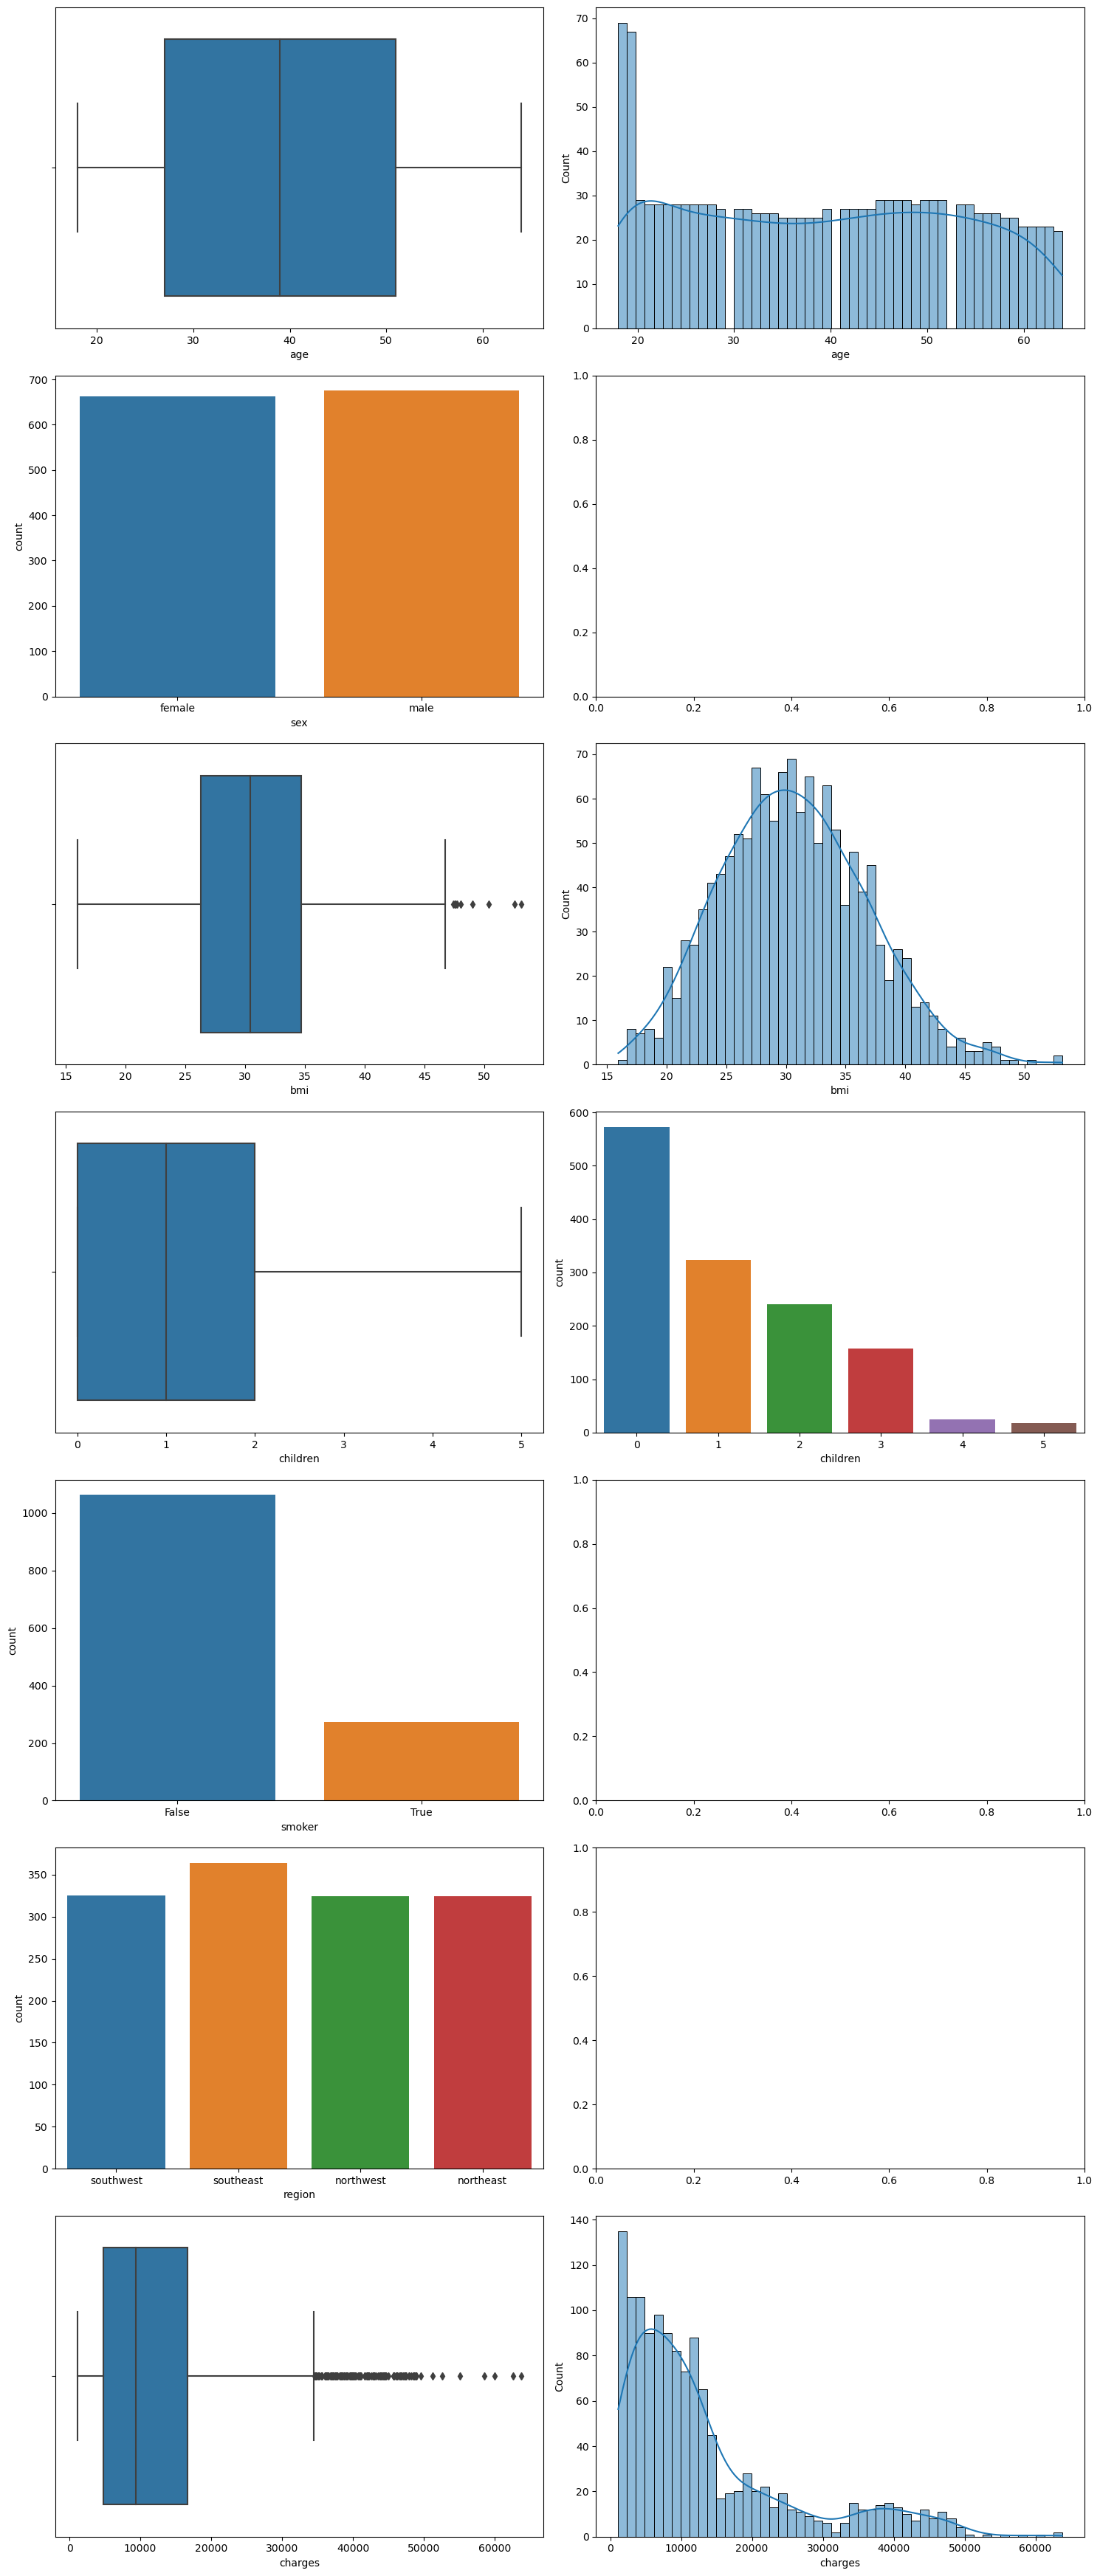

In [11]:

# Подготавливаем фигуру и оси с помощью matplotlib
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 35))  # 7 строк и 2 столбца

# Boxplot для 'age'
sns.boxplot(x='age', data=df, ax=axes[0, 0])

# Histplot для 'age'
sns.histplot(df['age'], bins=50, kde=True, ax=axes[0, 1])

# Countplot для 'sex'
sns.countplot(x='sex', data=df, ax=axes[1, 0])

# Boxplot для 'bmi'
sns.boxplot(x='bmi', data=df, ax=axes[2, 0])

# Histplot для 'bmi'
sns.histplot(df['bmi'], bins=50, kde=True, ax=axes[2, 1])

# Boxplot для 'children'
sns.boxplot(x='children', data=df, ax=axes[3, 0])

# Countplot для 'children'
sns.countplot(x='children', data=df, ax=axes[3, 1])

# Countplot для 'smoker'
sns.countplot(x='smoker', data=df, ax=axes[4, 0])

# Countplot для 'region'
sns.countplot(x='region', data=df, ax=axes[5, 0])

# Boxplot для 'charges'
sns.boxplot(x='charges', data=df, ax=axes[6, 0])

# Histplot для 'charges'
sns.histplot(df['charges'], bins=50, kde=True, ax=axes[6, 1])


# Убедимся, что нет перекрытия между подграфиками
plt.tight_layout()

# Показываем всю фигуру с подграфиками
plt.show()


## What we will investigate? 

1. How does `smoking` affect medical costs?
2. Probability of being a smoker
3. probability of having a certain number of children

### 1. Bivariate analysis: How does `smoking` affect medical costs?


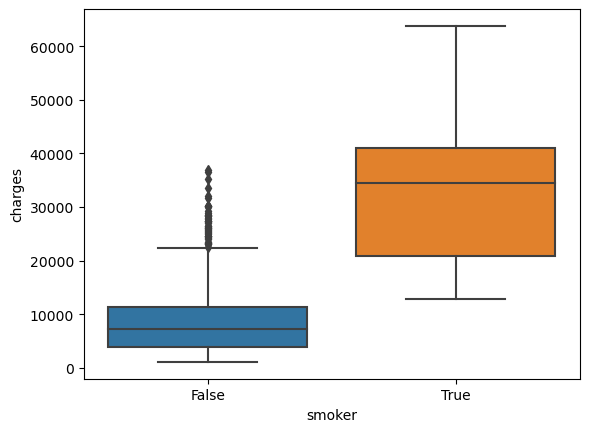

In [12]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()

### 2. How distributed smokers and non smokers?
Separate and plot smokers and non smokers 

274 1063


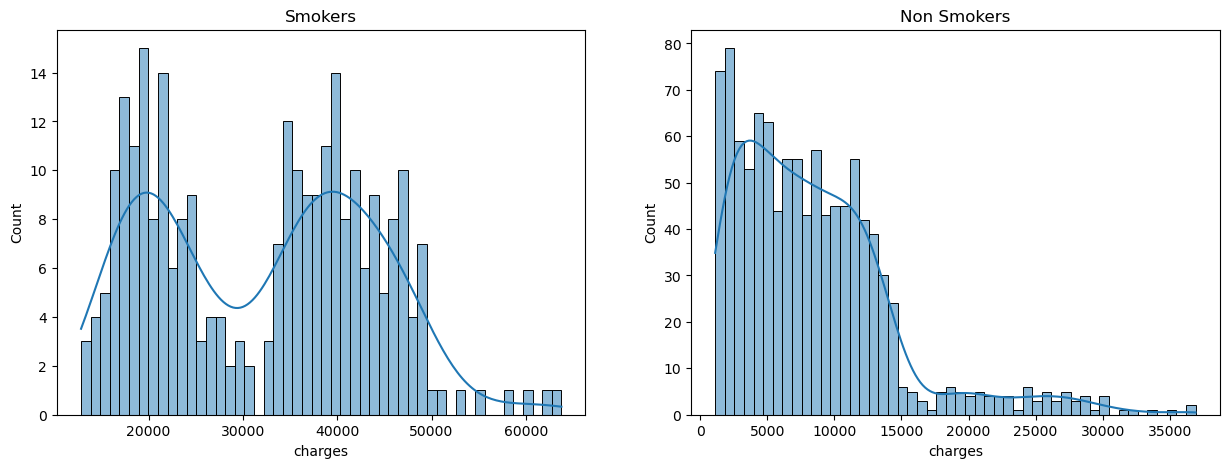

In [13]:
smoker_charges = df[df['smoker'] == True]['charges']
nonsmoker_charges = df[df['smoker'] == False]['charges']
print(smoker_charges.count(), nonsmoker_charges.count())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(smoker_charges, bins=50, kde=True, ax=axes[0],)
axes[0].set_title("Smokers")

sns.histplot(nonsmoker_charges, bins=50, kde=True, ax=axes[1])
axes[1].set_title("Non Smokers")
plt.show()

### 3. Make sampling distributions
Be cause our distributions are not normal distribution we will make sampling distribution

In [14]:
'''
sample_size = 50

smoker_sample_means = []
nonsmoker_sample_means = []

for i in range(500):
    sample = np.random.choice(smoker_charges, sample_size, replace = False)
    this_sample_mean = np.mean(sample)
    smoker_sample_means.append(this_sample_mean)

for i in range(500):
    sample = np.random.choice(nonsmoker_charges, sample_size, replace = False)
    this_sample_mean = np.mean(sample)
    nonsmoker_sample_means.append(this_sample_mean)


pd.DataFrame(smoker_sample_means, columns=['smoker_sample_means']).to_csv('smoker_sample_means.csv', index=False)
pd.DataFrame(nonsmoker_sample_means, columns=['nonsmoker_sample_means']).to_csv('nonsmoker_sample_means.csv', index=False)
'''
smoker_sample_means = pd.read_csv('smoker_sample_means.csv').squeeze()
nonsmoker_sample_means = pd.read_csv('nonsmoker_sample_means.csv').squeeze()
smoker_sample_means.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: smoker_sample_means
Non-Null Count  Dtype  
--------------  -----  
500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


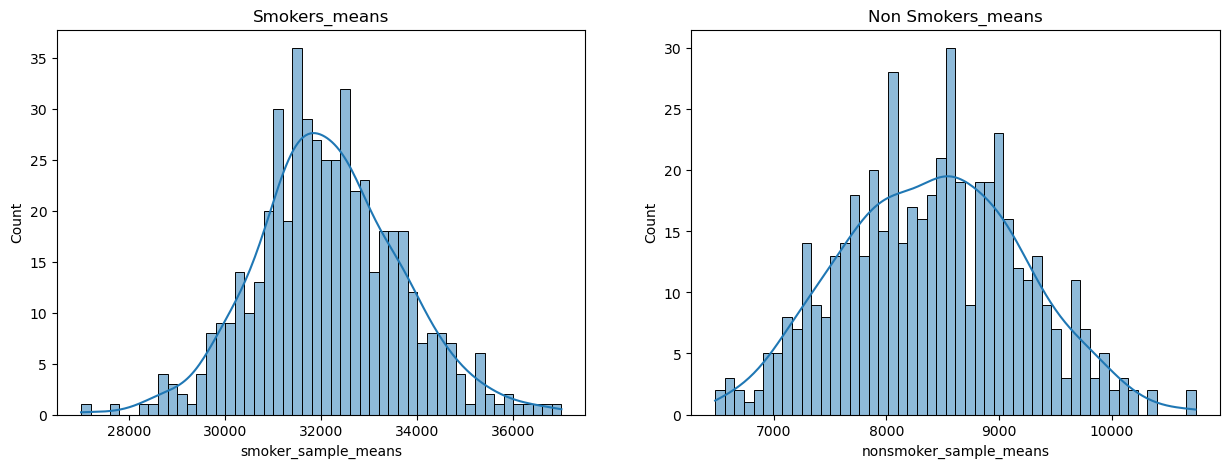

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(smoker_sample_means, bins=50, kde=True, ax=axes[0],)
axes[0].set_title("Smokers_means")

sns.histplot(nonsmoker_sample_means, bins=50, kde=True, ax=axes[1])
axes[1].set_title("Non Smokers_means")
plt.show()


##### 4. Two Sample T-Test

`H0`: There is no difference in medical charges between smokers and non smokers, any difference is getting by chance or simple fluctuation.<br>
`Ha`: There is significant diffirence between in medical charges between smokers and non smokers.<br>


In [16]:
_, p_value = stats.ttest_ind(smoker_sample_means, nonsmoker_sample_means, equal_var=False)
print("{:.2e}".format(p_value))

0.00e+00


##### 5. Two Sample T-Test result interpretation

Even when trying to format, the p-value still shows up as `0.00e+00`, indicating that it is so small that it cannot be represented in standard double precision floating point.

Such results usually mean that the differences between groups are too large to be explained by random distribution of the data, and therefore the `null hypothesis is rejected` with high confidence in favor of alternative.​

## Probability of being a smoker
What is probability that randomly chosen person will be a smoker?

p_smoker:  0.2049364248317128


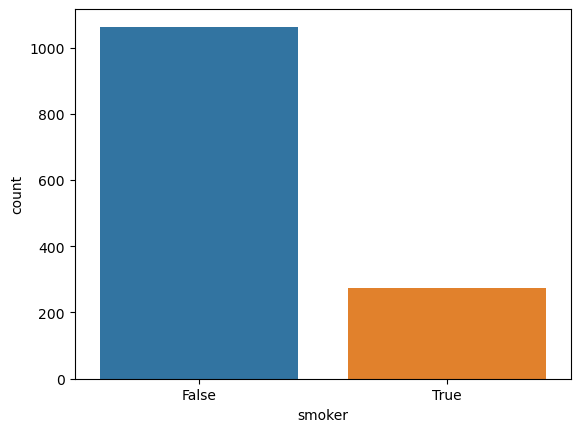

<Figure size 640x480 with 0 Axes>

In [29]:
p_smoker = len(df[df['smoker'] == True]) / len(df)
print("p_smoker: ",p_smoker)

sns.countplot(x='smoker', data=df)
plt.show()
plt.clf()

### What is the probability that out of 10 people chosen, 3 will be smokers?

In [34]:
print(stats.binom.pmf(k=3, n=10, p=p_smoker))

0.20742051754279378


## Probability of having a certain number of children

In [35]:
children_counts = df['children'].value_counts()

children_probabilities = children_counts / len(df)

children_probabilities.sort_index()


0    0.428571
1    0.242334
2    0.179506
3    0.117427
4    0.018699
5    0.013463
Name: children, dtype: float64

## What is the probability that out of 100 people chosen, 5 will have 5 children?

In [43]:
p_five_children = children_probabilities[5]
print(stats.binom.pmf(k=5,n=100, p=p_five_children))

0.009187563796907668


## the probability that 10 random people out of 100 will have 3 or more children

In [44]:
p_3_or_more_children = children_probabilities[3] + children_probabilities[4] + children_probabilities[5]

print(stats.binom.pmf(k=10,n=100, p=p_3_or_more_children))


0.04507190187660775
